# 1 is high stress, 0 is no stress

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine
from xgboost import XGBClassifier#XGBcalssifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings 

In [2]:
all_file=os.listdir('./')
files=[]
for each_file in all_file:
    try:
        if  each_file.split('.')[1]=='csv':
            files.append(each_file)
    except: continue

files

['csv_2.csv',
 'csv_3.csv',
 'csv_1.csv',
 'csv_58.csv',
 'csv_59.csv',
 'csv_0.csv',
 'csv_4.csv',
 'csv_5.csv',
 'csv_10.csv',
 'csv_12.csv',
 'csv_16.csv',
 'csv_17.csv',
 'csv_14.csv',
 'csv_31.csv',
 'csv_19.csv',
 'csv_18.csv',
 'csv_30.csv',
 'csv_32.csv',
 'csv_27.csv',
 'csv_23.csv',
 'csv_36.csv',
 'csv_22.csv',
 'csv_34.csv',
 'csv_20.csv',
 'csv_35.csv',
 'csv_52.csv',
 'csv_46.csv',
 'csv_53.csv',
 'csv_8.csv',
 'csv_45.csv',
 'csv_51.csv',
 'csv_44.csv',
 'csv_9.csv',
 'csv_57.csv',
 'csv_43.csv',
 'csv_42.csv',
 'csv_56.csv']

In [3]:
# df=None
# for f in file:

#     data=pd.read_csv(f)
#     if df is None:
#         df=data
#     else:
#         df=pd.concat([df,data])
# # df=df.drop('Unnamed: 0',axis=1)
# 
# df=df.drop('conv_level',axis=1)
# df

In [4]:
# df=df.drop('Unnamed: 0',axis=1)
# df.describe()

In [5]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time

def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
    
def group_stress(data):
    if data<3:
        return 0
    if data >3:
        return 0
    return 1

time_type='%d:%m:%Y'
accuracy1=[]
error_files=[]
for file in files:
    try:
        warnings.filterwarnings("ignore")
        week=[]
        df=pd.read_csv(file)
        df=df.rename(columns={'Unnamed: 0':'date','final_level':'level','cut_class':'skip_class'})
        for date in df.date.values:
            week.append(transform_week(date))
        df['week']=week
        for col in [ 'home_time', 'school_time', 'travel_time',
                    'recreational_activities', 'orthers','working', 'shopping']:
            try:
                df[col]=df[col].apply(lambda x: offset(x))
                df[col]=df[col].fillna(0)
            except: pass

    # for col in [ 'home_time', 'school_time', 'travel_time',
    #             'recreational_activities', 'orthers','working', 'shopping']:
    #     df[col]=df[col].apply(lambda x: to_min(x))
        df['date_in_week']=df['date_in_week'].values+1
        df['None_school_time']=86400-df.school_time-df.home_time
        df.week=df.week.astype(int)
        df['level']=df['level'].apply(lambda x:group_stress(x)).astype('category')
        sns.histplot(df,x='week',hue='level',kde=True,palette='crest',
                     stat='percent',alpha=0.4,discrete = True       )
        plt.title('Stress of student who $\\bf{skip}$ class')
        index=file.split('.')[0]
        plt.savefig(f'../image_stress/{index}stress by week.png')
        plt.clf()
        df=df.dropna()
        X=df.drop(['level','date','location_names','volunteer'],axis=1)
        y=df['level']

        X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)

        seed=200
        kfold = KFold(5, shuffle=True, random_state=seed) # k=10, split the data into 10 equal parts

        cv_mean=[]
        accuracy=[]
        std=[]
        classifier=[]
        model=RandomForestClassifier(random_state=seed)


        entries=[]

        model_name = model.__class__.__name__
        kfold = StratifiedKFold(5, shuffle=True, random_state=seed)
        scores = cross_val_score(model, X,y, cv=kfold,error_score='raise')
        for fold_idx, score in enumerate(scores):
            entries.append([model_name, fold_idx, score])
        cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
        acc_mean=float(cv_df['accuracy_score'].mean())
        
        
        sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
        plt.savefig(f'../image_ml/{index} ML report.png')
        plt.clf()
        accuracy1.append(acc_mean)
       
    except:
        error_files.append(file) 

<Figure size 640x480 with 0 Axes>

In [6]:
def offset(data):
    try:
        if float(data)>86400:
            return 0
        return data
    except:
        return data
def to_min(time):
    try:
        return int(time/60)
    except: return time

def transform_week(time):
        time=datetime.strptime(time,time_type)
        return datetime.strftime(time,'%W')
    
def group_stress(data):
    if data<3:
        return 0
    if data >3:
        return 0
    return 1

time_type='%d:%m:%Y'
accuracy2=[]
error_files=[]
for file in files:
    try:
        warnings.filterwarnings("ignore")
        week=[]
        df=pd.read_csv(file)
        df=df.rename(columns={'Unnamed: 0':'date','final_level':'level','cut_class':'skip_class'})
        for date in df.date.values:
            week.append(transform_week(date))
        df['week']=week
        for col in [ 'home_time', 'school_time', 'travel_time',
                    'recreational_activities', 'orthers','working', 'shopping']:
            try:
                df[col]=df[col].apply(lambda x: offset(x))
                df[col]=df[col].fillna(0)
            except: pass

    # for col in [ 'home_time', 'school_time', 'travel_time',
    #             'recreational_activities', 'orthers','working', 'shopping']:
    #     df[col]=df[col].apply(lambda x: to_min(x))
        df['date_in_week']=df['date_in_week'].values+1
        df['None_school_time']=86400-df.school_time-df.home_time
        df.week=df.week.astype(int)
        df['level']=df['level'].apply(lambda x:group_stress(x)).astype('category')
        sns.histplot(df,x='week',hue='level',kde=True,palette='crest',
                     stat='percent',alpha=0.4,discrete = True       )
        plt.title('Stress of student who $\\bf{skip}$ class')
        index=file.split('.')[0]
        plt.savefig(f'../image_stress/{index}stress by week.png')
        plt.clf()
        df=df.dropna()
        X=df.drop(['level','date','location_names','volunteer'],axis=1)
        y=df['level']

        X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)

        seed=200
        kfold = KFold(5, shuffle=True, random_state=seed) # k=10, split the data into 10 equal parts

        cv_mean=[]
        accuracy=[]
        std=[]
        classifier=[]
        model=XGBClassifier ( eval_metric='logloss', random_state=seed)

        entries=[]

        model_name = model.__class__.__name__
        kfold = StratifiedKFold(5, shuffle=True, random_state=seed)
        scores = cross_val_score(model, X,y, cv=kfold,error_score='raise')
        for fold_idx, score in enumerate(scores):
            entries.append([model_name, fold_idx, score])
        cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
        acc_mean=float(cv_df['accuracy_score'].mean())
        
        
        sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
        plt.savefig(f'../image_ml/{index} ML report.png')
        plt.clf()
        accuracy2.append(acc_mean)
       
    except:
        error_files.append(file) 

<Figure size 640x480 with 0 Axes>

In [7]:
error_files

['csv_5.csv', 'csv_17.csv', 'csv_34.csv', 'csv_20.csv', 'csv_9.csv']

In [8]:
acc_df=pd.DataFrame(accuracy1+accuracy2,
                    index=['RandomForest']*len(accuracy1)+['XGBoost']*len(accuracy2)
                    ,columns=['accuracy'])
acc_df=acc_df.reset_index()
acc_df

,index,accuracy
0,RandomForest,0.880000
1,RandomForest,1.000000
2,RandomForest,0.880000
3,RandomForest,0.926667
4,RandomForest,0.817857
...,...,...
60,XGBoost,0.977778
61,XGBoost,0.817857
62,XGBoost,0.830000
63,XGBoost,0.933333


<Axes: xlabel='index', ylabel='accuracy'>

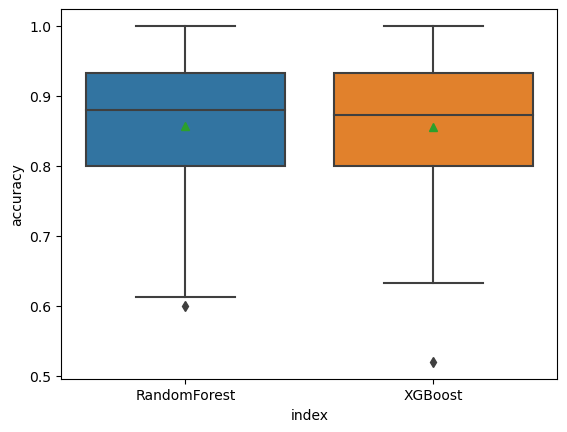

In [9]:
sns.boxplot(acc_df,y='accuracy',x='index',showmeans=True)


In [10]:
acc_df_gr=acc_df.groupby('index').describe()
acc_df_gr

accuracy                                                        
                count      mean       std   min  25%       50%       75%  max
index                                                                        
RandomForest     33.0  0.857335  0.112347  0.60  0.8  0.880000  0.933333  1.0
XGBoost          32.0  0.855146  0.117694  0.52  0.8  0.873333  0.933333  1.0

In [11]:
a=[]
for i in range(10):
    try:
        a.append(i)
        print(a)
    except: pass
a

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
# from bioinfokit.analys import stat
# ANOVA=None
# for col in df.columns:
#     if col not in ['date','level','volunteer']:
#         res = stat()
#         res.anova_stat(df=df, res_var='level'
#                              , anova_model=f"level ~ C({col})")
# #         print(res.anova_summary.iloc[0,:])
#         if ANOVA is None:
#             ANOVA=res.anova_summary
#         else:
#             ANOVA=pd.concat([ANOVA,res.anova_summary])

In [13]:
# ANOVA=ANOVA.drop('Residual')

In [14]:
# ANOVA['PR(>F)']=ANOVA['PR(>F)']*100

In [15]:
# ANOVA['PR(>F)']=ANOVA['PR(>F)'].astype(int)
# ANOVA=ANOVA.rename(columns={'PR(>F)':'p_value(%)'})
# ANOVA

In [16]:
# import dataframe_image as dfi
# dfi.export(ANOVA ,'../ANOVA_table_final_data_no_filter.png')

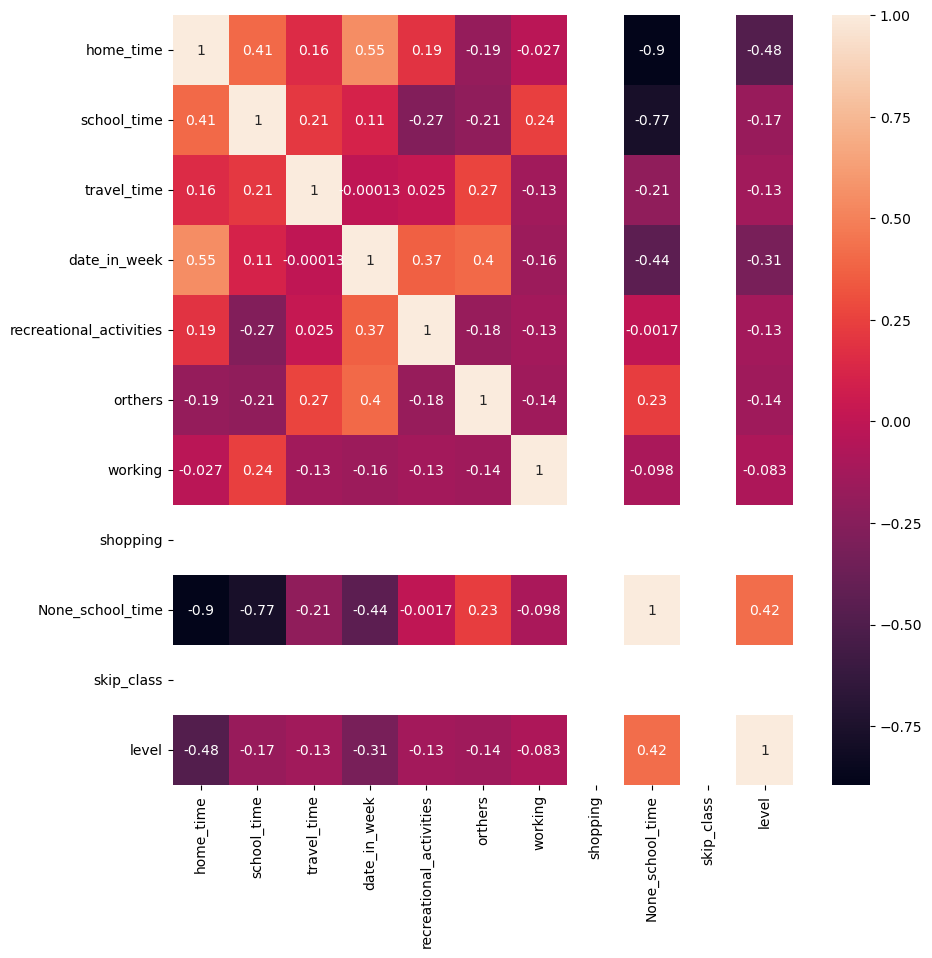

In [17]:
corr=df[[ 'home_time', 'school_time', 'travel_time', 'date_in_week',
        'recreational_activities', 'orthers',
       'working', 'shopping','None_school_time','skip_class','level']].corr()
ax,fig=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('../image/corr.png')

In [18]:
# sns.histplot(df,x='home_time',y='date_in_week',cbar=True)
# plt.savefig('../image/hometime vs day.png')

In [19]:
df

,date,home_time,school_time,orthers,travel_time,shopping,recreational_activities,working,date_in_week,skip_class,...,min,mean,std,25%,med or 50%,75%,freq,level,week,None_school_time
4,02:05:2013,53999.0,45602.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1200.0,1200.000000,0.000000,1200.00,1200.0,1200.00,2.0,0,17,-13201.0
8,04:05:2013,49983.0,3598.0,0.0,0.0,0.0,9615.0,0.0,6.0,0.0,...,1.0,2644.142857,4437.683083,1109.50,1200.0,1215.50,7.0,0,17,32819.0
13,08:04:2013,34805.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,3120.500000,3258.916359,1200.00,1800.0,3300.00,10.0,0,14,51595.0
15,09:04:2013,38399.0,20392.0,0.0,1204.0,0.0,4802.0,0.0,2.0,0.0,...,1200.0,2201.000000,1595.143505,1200.00,1202.0,3001.00,6.0,0,14,27609.0
16,10:04:2013,52800.0,27602.0,1198.0,6000.0,0.0,1198.0,0.0,3.0,0.0,...,1200.0,1885.714286,944.154951,1200.00,1200.0,2400.00,7.0,0,14,5998.0
17,11:04:2013,0.0,16801.0,3600.0,1199.0,0.0,0.0,0.0,4.0,0.0,...,1153.0,1842.538462,934.303896,1200.00,1200.0,2400.00,13.0,0,14,69599.0
19,13:04:2013,61202.0,1200.0,2400.0,0.0,0.0,0.0,0.0,6.0,0.0,...,363.0,14791.250000,26953.467722,990.75,1800.0,15600.50,4.0,0,14,23998.0
23,15:04:2013,1200.0,10800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1200.0,1600.000000,781.606737,1200.00,1200.0,1500.00,12.0,1,15,74400.0
25,16:04:2013,53999.0,28801.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1200.0,2266.666667,1637.070554,1200.00,1200.0,2400.00,9.0,0,15,3600.0
27,17:04:2013,54000.0,38392.0,0.0,1200.0,0.0,8.0,0.0,3.0,0.0,...,1070.0,1567.333333,621.812405,1200.00,1200.0,2050.50,6.0,0,15,-5992.0


In [20]:
df=df.sort_values(['week','date'])
df=df.reset_index(drop=True)
# df=df.drop('date.1',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     13 non-null     object  
 1   home_time                13 non-null     float64 
 2   school_time              13 non-null     float64 
 3   orthers                  13 non-null     float64 
 4   travel_time              13 non-null     float64 
 5   shopping                 13 non-null     float64 
 6   recreational_activities  13 non-null     float64 
 7   working                  13 non-null     float64 
 8   date_in_week             13 non-null     float64 
 9   skip_class               13 non-null     float64 
 10  class_schedule           13 non-null     float64 
 11  volunteer                13 non-null     float64 
 12  location_names           13 non-null     object  
 13  conv_dur_sum             13 non-null     float64 
 14  conv_max    

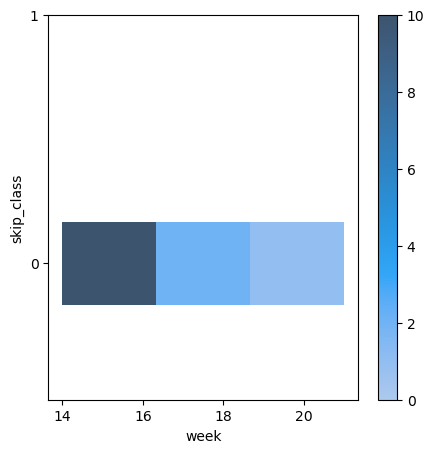

In [21]:
ax,fig=plt.subplots(figsize=(5,5))
sns.histplot(df,x='week',y='skip_class',cbar=True,bins=3)
plt.yticks([0,1])
plt.savefig('../image/cutclass vs week.png')

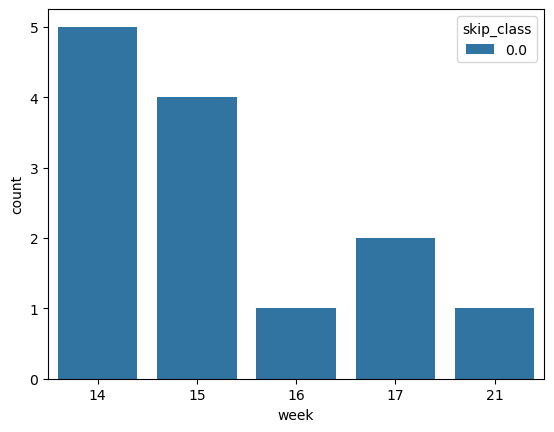

In [22]:
sns.countplot(df,x='week',hue='skip_class')
plt.savefig('../image/count skip class vs week.png')

In [23]:
# print(df['level'].unique())
df_stress=df.iloc[:,1:]
# df_stress['level']=df_stress['level'].fillna(df_stress['level'].median())
# df_stress['level']=df_stress['level'].fillna(0)


[0, 1]
Categories (2, int64): [0, 1]


<Axes: xlabel='level', ylabel='count'>

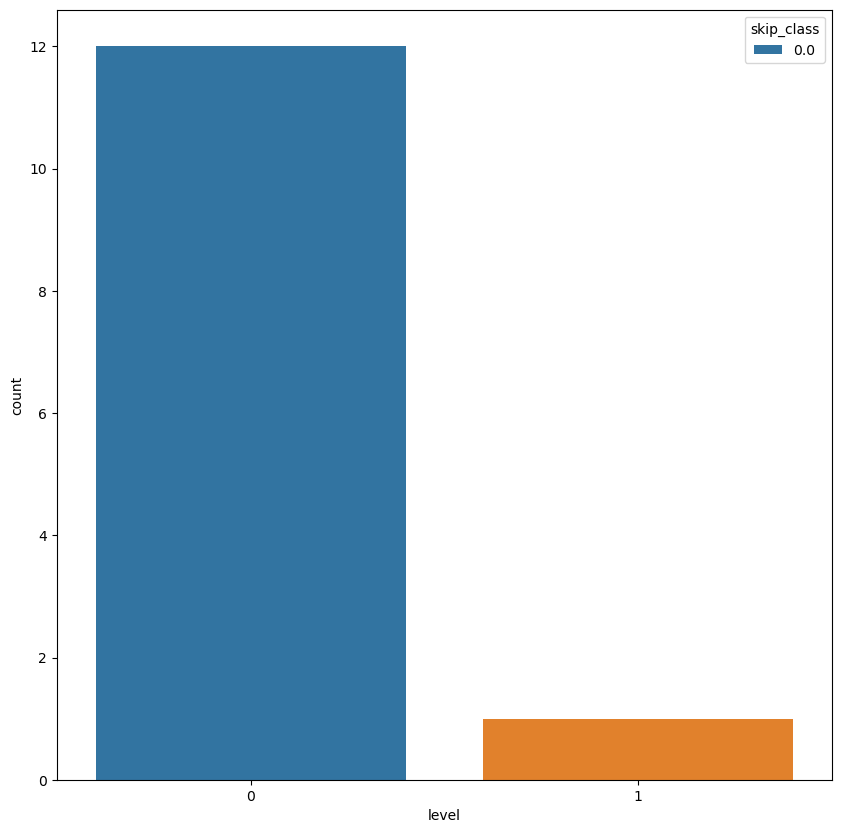

In [24]:
df_stress['level']=df_stress['level'].astype(int)
ax,fig=plt.subplots(figsize=(10,10))
sns.countplot(df_stress,x='level',hue='skip_class')
plt.xticks(rotation=0)
# plt.savefig('../image/stress vs skip class.png')
print(df['level'].unique())
sns.countplot(df_stress,x='level')

In [25]:
df_stress

,home_time,school_time,orthers,travel_time,shopping,recreational_activities,working,date_in_week,skip_class,class_schedule,...,min,mean,std,25%,med or 50%,75%,freq,level,week,None_school_time
0,34805.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,3120.500000,3258.916359,1200.00,1800.0,3300.00,10.0,0,14,51595.0
1,38399.0,20392.0,0.0,1204.0,0.0,4802.0,0.0,2.0,0.0,0.0,...,1200.0,2201.000000,1595.143505,1200.00,1202.0,3001.00,6.0,0,14,27609.0
2,52800.0,27602.0,1198.0,6000.0,0.0,1198.0,0.0,3.0,0.0,0.0,...,1200.0,1885.714286,944.154951,1200.00,1200.0,2400.00,7.0,0,14,5998.0
3,0.0,16801.0,3600.0,1199.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1153.0,1842.538462,934.303896,1200.00,1200.0,2400.00,13.0,0,14,69599.0
4,61202.0,1200.0,2400.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,363.0,14791.250000,26953.467722,990.75,1800.0,15600.50,4.0,0,14,23998.0
5,1200.0,10800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1200.0,1600.000000,781.606737,1200.00,1200.0,1500.00,12.0,1,15,74400.0
6,53999.0,28801.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1200.0,2266.666667,1637.070554,1200.00,1200.0,2400.00,9.0,0,15,3600.0
7,54000.0,38392.0,0.0,1200.0,0.0,8.0,0.0,3.0,0.0,0.0,...,1070.0,1567.333333,621.812405,1200.00,1200.0,2050.50,6.0,0,15,-5992.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1198.0,2332.400000,2819.038694,1200.00,1200.0,2011.25,10.0,0,15,86400.0
9,49200.0,32400.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,717.0,1318.166667,563.413673,1194.00,1200.0,1200.75,6.0,0,16,4800.0


In [26]:
stress_cut_classes=df_stress[df_stress['skip_class']==1]['level']
stress_no_cut_classes=df_stress[df_stress['skip_class']==0]['level']

from scipy.stats import f_oneway
f_oneway(stress_no_cut_classes,stress_cut_classes)

F_onewayResult(statistic=nan, pvalue=nan)

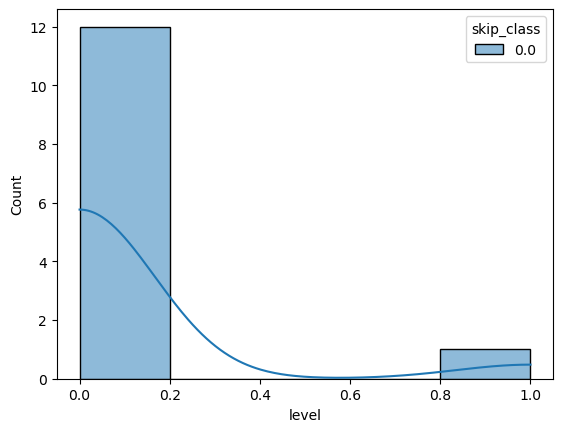

In [27]:
sns.histplot(df_stress,x='level',hue='skip_class',kde=True)
plt.savefig('../image/stress by skip class.png')

In [28]:
no_cut_class_data=df_stress[df_stress['skip_class']==0]
cut_class_data=df_stress[df_stress['skip_class']==1]
no_cut_class_data=no_cut_class_data['level'].value_counts().to_frame()
no_cut_class_data['count']=no_cut_class_data['count']/(no_cut_class_data['count'].sum())
no_cut_class_data
cut_class_data=cut_class_data['level'].value_counts().to_frame()
cut_class_data['count']=cut_class_data['count']/cut_class_data['count'].sum()
cut_class_data

,count
level,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


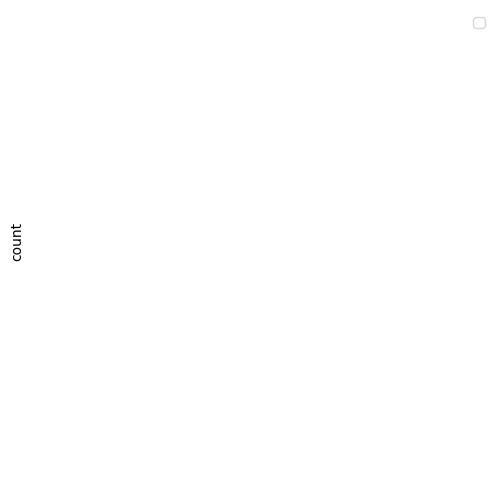

In [29]:
cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio cut class.png')

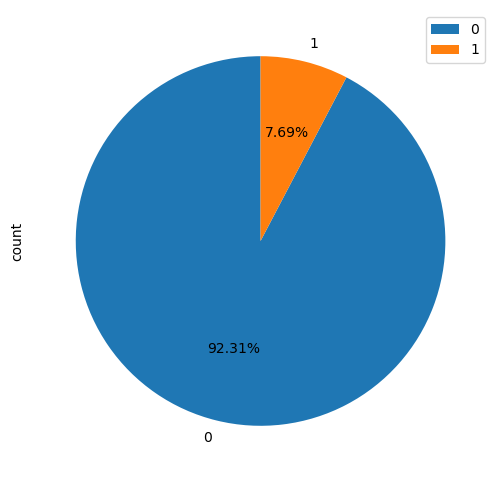

In [30]:
no_cut_class_data.plot.pie(subplots=True, figsize=(11, 6),startangle=90,autopct='%1.2f%%')
plt.savefig('../image/stress ratio no cut class.png')

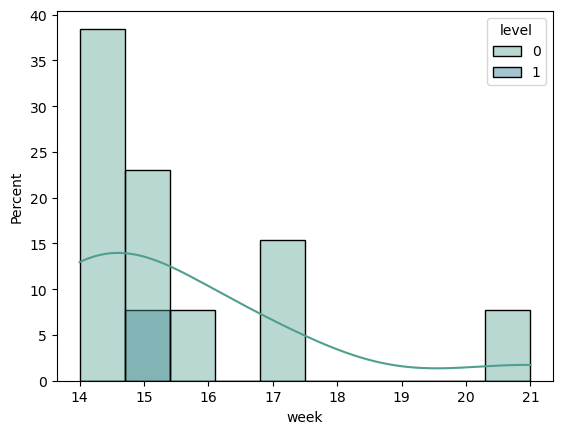

In [31]:
sns.histplot(df_stress,x='week',hue='level',kde=True,palette='crest',bins=10,stat='percent',alpha=0.4)
plt.savefig('../image/stress by week.png')

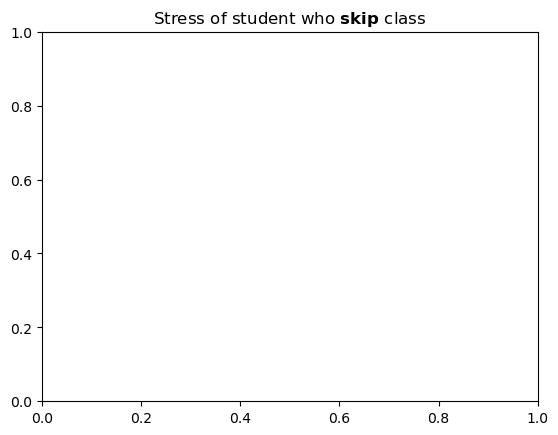

In [32]:
sns.histplot(df_stress[df_stress['skip_class']==1],x='week',hue='level',kde=True,palette='crest',bins=10,stat='percent',alpha=0.4        )
plt.title('Stress of student who $\\bf{skip}$ class')
plt.savefig('../image/stress by week who skip class.png')

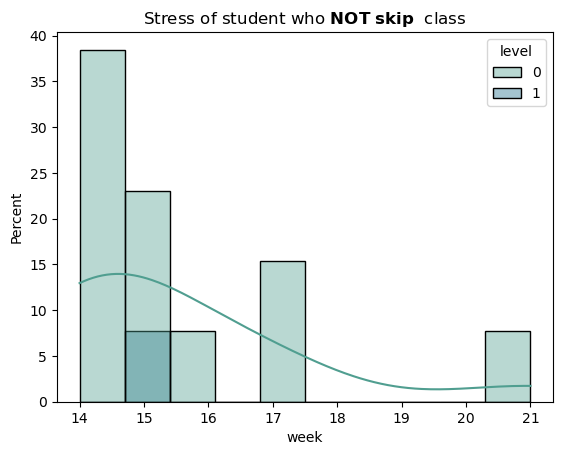

In [33]:
sns.histplot(df_stress[df_stress['skip_class']==0],x='week',hue='level',kde=True,bins=10,palette='crest',stat='percent',alpha=0.4)
plt.title('Stress of student who $\\bf{NOT }$ $\\bf{skip}$  class')
plt.savefig('../image/stress by week who $\\bf{NOT}$ skip class.png')

In [34]:
df_stress_fix=df_stress
df_stress_fix['school_time']=(df_stress_fix['school_time']/60).astype(int)



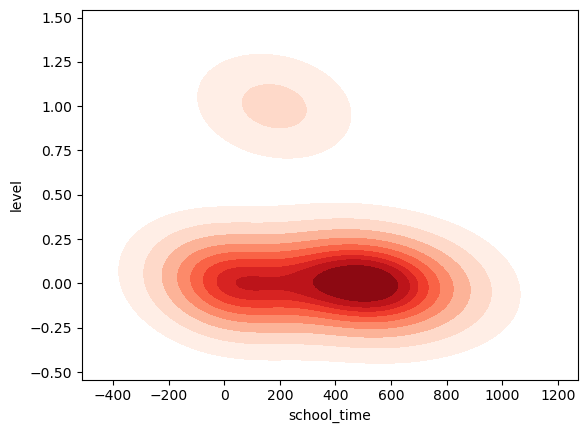

In [35]:
sns.kdeplot(df_stress_fix,x='school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by school time.png')

In [36]:
df_stress_fix['None_school_time']=(df_stress_fix['None_school_time']/60).astype(int)

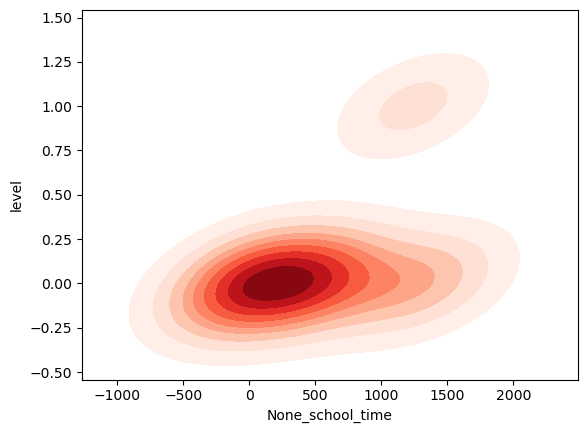

In [37]:
sns.kdeplot(df_stress_fix,x='None_school_time',y='level',cmap='Reds',fill=True)
plt.savefig('../image/stress by none school time.png')

In [38]:
df.info()
df_stress['week']=df_stress['week'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     13 non-null     object  
 1   home_time                13 non-null     float64 
 2   school_time              13 non-null     float64 
 3   orthers                  13 non-null     float64 
 4   travel_time              13 non-null     float64 
 5   shopping                 13 non-null     float64 
 6   recreational_activities  13 non-null     float64 
 7   working                  13 non-null     float64 
 8   date_in_week             13 non-null     float64 
 9   skip_class               13 non-null     float64 
 10  class_schedule           13 non-null     float64 
 11  volunteer                13 non-null     float64 
 12  location_names           13 non-null     object  
 13  conv_dur_sum             13 non-null     float64 
 14  conv_max    

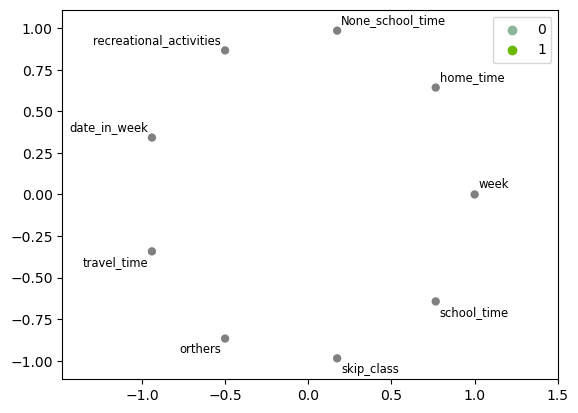

In [39]:
pd.plotting.radviz(df_stress[['week', 'home_time','None_school_time',
        'recreational_activities','date_in_week',
        'travel_time',
        'orthers', 'skip_class' ,'school_time' ,
        'level' 
       ]],'level')
plt.savefig('../image/radvix.png')

<Axes: xlabel='level', ylabel='count'>

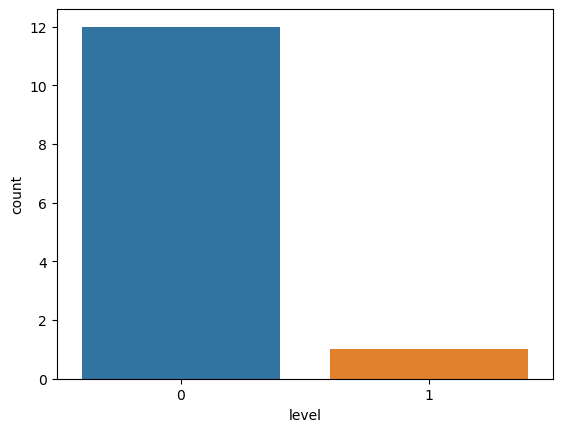

In [40]:
sns.countplot(df_stress,x='level')

In [41]:
df.describe()

,home_time,school_time,orthers,travel_time,shopping,recreational_activities,working,date_in_week,skip_class,class_schedule,...,max,min,mean,std,25%,med or 50%,75%,freq,week,None_school_time
count,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.0,13.0,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,37296.692308,19845.230769,553.692308,738.692308,0.0,1201.769231,1753.846154,3.000000,0.0,0.0,...,9884.769231,909.538462,3269.150944,3839.563998,1247.961538,1523.230769,3544.576923,7.384615,15.461538,29258.076923
std,22449.890272,15688.843027,1160.808869,1664.170333,0.0,2860.178554,6323.582237,1.914854,0.0,0.0,...,14199.312302,477.450105,3651.096904,7131.017625,271.663603,834.754870,4009.553036,3.254189,1.983910,32179.361907
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1200.000000,1.000000,1200.000000,0.000000,990.750000,1200.000000,1200.000000,2.000000,14.000000,-13201.000000
25%,34805.000000,3598.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.0,0.0,...,3600.000000,717.000000,1600.000000,781.606737,1200.000000,1200.000000,1500.000000,6.000000,14.000000,4800.000000
50%,49200.000000,20392.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,0.0,0.0,...,4802.000000,1198.000000,2201.000000,1595.143505,1200.000000,1200.000000,2400.000000,7.000000,15.000000,23998.000000
75%,53999.000000,32400.000000,0.000000,1199.000000,0.0,8.000000,0.000000,4.000000,0.0,0.0,...,10241.000000,1200.000000,2644.142857,3258.916359,1200.000000,1202.000000,3001.000000,10.000000,16.000000,51595.000000
max,61202.000000,45602.000000,3600.000000,6000.000000,0.0,9615.000000,22800.000000,6.000000,0.0,0.0,...,55202.000000,1317.000000,14791.250000,26953.467722,2129.250000,4200.000000,15600.500000,13.000000,21.000000,86400.000000


array([    0., 20392., 27602., 16801.,  1200., 10800., 28801., 38392.,
       32400., 45602.,  3598.])

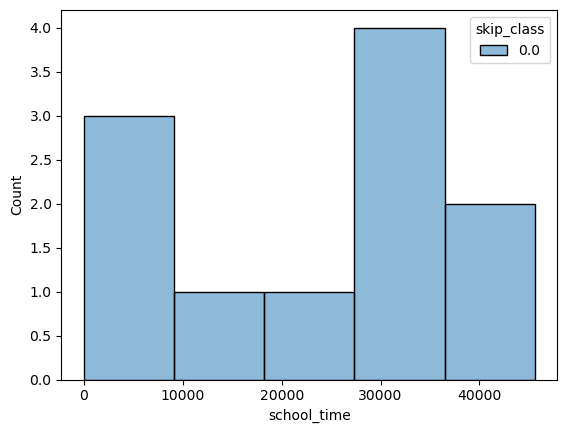

In [42]:
df=df.reset_index(drop=True)
df_new=df.drop(df[df['home_time']==0].index)

sns.histplot(df_new,x='school_time',hue='skip_class')

df_new.describe()
df['school_time'].unique()


In [43]:
df.school_time.value_counts

<bound method IndexOpsMixin.value_counts of 0         0.0
1     20392.0
2     27602.0
3     16801.0
4      1200.0
5     10800.0
6     28801.0
7     38392.0
8         0.0
9     32400.0
10    45602.0
11     3598.0
12    32400.0
Name: school_time, dtype: float64>

In [44]:
df.columns

Index(['date', 'home_time', 'school_time', 'orthers', 'travel_time',
       'shopping', 'recreational_activities', 'working', 'date_in_week',
       'skip_class', 'class_schedule', 'volunteer', 'location_names',
       'conv_dur_sum', 'conv_max', 'conv_min', 'conv_mean', 'conv_std',
       'conv_25%', 'conv_med or 50%', 'conv_75%', 'conv_freq', 'conv_level',
       'dur_sum', 'max', 'min', 'mean', 'std', '25%', 'med or 50%', '75%',
       'freq', 'level', 'week', 'None_school_time'],
      dtype='object')

In [45]:
y=df['level']
y.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [46]:
print(df.info())
df=df.dropna()
print(df.isna().sum())
df['week']=df['week'].astype(int)
X=df.drop(['level','date','location_names','volunteer'],axis=1)
y=df['level']
# y=y.fillna(y.median())
y=y.astype(int)
# y=y.apply(lambda x:group_stress(x))
y.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     13 non-null     object  
 1   home_time                13 non-null     float64 
 2   school_time              13 non-null     float64 
 3   orthers                  13 non-null     float64 
 4   travel_time              13 non-null     float64 
 5   shopping                 13 non-null     float64 
 6   recreational_activities  13 non-null     float64 
 7   working                  13 non-null     float64 
 8   date_in_week             13 non-null     float64 
 9   skip_class               13 non-null     float64 
 10  class_schedule           13 non-null     float64 
 11  volunteer                13 non-null     float64 
 12  location_names           13 non-null     object  
 13  conv_dur_sum             13 non-null     float64 
 14  conv_max    

array([0, 1])

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   home_time                13 non-null     float64
 1   school_time              13 non-null     float64
 2   orthers                  13 non-null     float64
 3   travel_time              13 non-null     float64
 4   shopping                 13 non-null     float64
 5   recreational_activities  13 non-null     float64
 6   working                  13 non-null     float64
 7   date_in_week             13 non-null     float64
 8   skip_class               13 non-null     float64
 9   class_schedule           13 non-null     float64
 10  conv_dur_sum             13 non-null     float64
 11  conv_max                 13 non-null     float64
 12  conv_min                 13 non-null     float64
 13  conv_mean                13 non-null     float64
 14  conv_std                 13 

In [48]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13 entries, 0 to 12
Series name: level
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 232.0 bytes


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train, X_vad, y_train, y_vad = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ML, X_vad_ML, y_train_ML, y_vad_ML= X_train, X_vad, y_train, y_vad

# X_train = scaler.fit_transform(X_train)

# X_vad = scaler.fit_transform(X_vad)
X.shape


(13, 31)

In [50]:
y.unique()

array([0, 1])

In [51]:
y.describe()

count    13.000000
mean      0.076923
std       0.277350
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: level, dtype: float64

In [52]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)

X_train_ada, X_vad_ada, y_train_ada, y_vad_ada = train_test_split(X, y, test_size=0.2, random_state=42)

# ADASYN

In [53]:
X_train_ada, y_train_ada = ada.fit_resample(X_train_ada, y_train_ada)
model_ada=RandomForestClassifier(random_state=10)
model_ada.fit(X_train_ada,y_train_ada)
prediction1=model_ada.predict(X_vad_ada)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_ada))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_ada, normalize='true')
print(metrics.classification_report(prediction1,y_vad_ada))
sns.heatmap(conf,annot=True)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

# ENN

In [ ]:
from imblearn.combine import SMOTEENN
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()

X_train_smoteenn, X_vad_smoteenn, y_train_smoteenn, y_vad_smoteenn = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_smoteenn, y_train_smoteenn = smenn.fit_resample(X_train_smoteenn, y_train_smoteenn)
model_smoteenn=RandomForestClassifier(random_state=10)
model_smoteenn.fit(X_train_smoteenn,y_train_smoteenn)
prediction1=model_smoteenn.predict(X_vad_smoteenn)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smoteenn))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smoteenn, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smoteenn))
sns.heatmap(conf,annot=True)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# oversampling the train dataset using SMOTE
sm = SMOTE()
X_train_smote, X_vad_smote, y_train_smote, y_vad_smote = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train_smote)

model_smote=RandomForestClassifier(random_state=200)
model_smote.fit(X_train_smote,y_train_smote)
prediction1=model_smote.predict(X_vad_smote)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smote))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smote, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smote))
sns.heatmap(conf,annot=True)

# tomek

In [ ]:
from imblearn.combine import SMOTETomek
# oversampling the train dataset using SMOTE + ENN
smtomek = SMOTETomek()

X_train_smotetomek, X_vad_smotetomek, y_train_smotetomek, y_vad_smotetomek = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_smotetomek, y_train_smotetomek = smtomek.fit_resample(X_train_smotetomek, y_train_smotetomek)
model_smotetomek=RandomForestClassifier(random_state=10)
model_smotetomek.fit(X_train_smotetomek,y_train_smotetomek)
prediction1=model_smotetomek.predict(X_vad_smotetomek)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad_smotetomek))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad_smotetomek, normalize='true')
print(metrics.classification_report(prediction1,y_vad_smotetomek))
sns.heatmap(conf,annot=True)

In [ ]:
# from xgboost import XGBClassifier#XGBcalssifier
# seed=200
# model=XGBClassifier (use_label_encoder=False, eval_metric='logloss', random_state=seed)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for XBG is ',metrics.accuracy_score(prediction1,y_vad))

In [ ]:
# data_smote=pd.concat([X_smoteenn, y_smoteenn],axis=1)
# data_smote.level.value_counts()

In [ ]:

# df.dropna().level.value_counts()

In [ ]:
# data_ada=pd.concat([X_ada, y_ada],axis=1)
# data_ada.level.value_counts()

In [ ]:
model=RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
prediction1=model.predict(X_vad)
print('Accuracy for RF is ',metrics.accuracy_score(prediction1,y_vad))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(prediction1,y_vad, normalize='true')
print(metrics.classification_report(prediction1,y_vad))
sns.heatmap(conf,annot=True)

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import svm #support vector Machine
from xgboost import XGBClassifier#XGBcalssifier
from sklearn.neighbors import KNeighborsClassifier #KNN
seed=200
kfold = KFold(5, shuffle=True, random_state=seed) # k=10, split the data into 10 equal parts

cv_mean=[]
accuracy=[]
std=[]
classifier=[]
models=[svm.SVC(random_state=seed),RandomForestClassifier(random_state=seed),XGBClassifier ( eval_metric='logloss', random_state=seed)]
for model in models:
    model_name = model.__class__.__name__
    if model_name not in(classifier):
        classifier.append(model_name)
    cv_result = cross_val_score(model,X, y, cv = kfold)
    
    cv_mean.append(round(cv_result.mean(),2))
    std.append(round(cv_result.std(),2))
    accuracy.append(cv_result)
    print(model)
new_models_dataframe=pd.DataFrame({'ML model':classifier,'accuracy_score':cv_mean,'std':std})
new_models_dataframe=new_models_dataframe.set_index('ML model')
new_models_dataframe

In [ ]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
entries=[]
for model in models:
    model_name = model.__class__.__name__
    kfold = StratifiedKFold(5, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X,y, cv=kfold)
    for fold_idx, score in enumerate(scores):
        entries.append([model_name, fold_idx, score])
cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
plt.xticks(rotation=60)

In [ ]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
for model in models:
    model_name = f'{model.__class__.__name__} smoteenn'
    kfold = StratifiedKFold(10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X, y, cv=kfold)
    for fold_idx, score in enumerate(scores):
        entries.append([model_name, fold_idx, score])
cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
plt.xticks(rotation=60)

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
common_params = {
    "X": X,
    "y":  y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
rf=RandomForestClassifier(random_state=seed)
xgb=XGBClassifier ( eval_metric='logloss', random_state=seed)
for ax_idx, estimator in enumerate([rf, xgb]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
X_enn,y_enn=smenn.fit_resample(X, y)
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,auc #for confusion matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
name_col=[]
names=[]
tpr=[]
fpr=[]
index=[]
AUROC=[]
tprs=[]
fprs=[]

def get_tpr_fpr(true_y, y_prob, tprs, fprs):
#     """
#     plots the roc curve based of the probabilities
#     """
    true_y=true_y.values

    fpr, tpr, thresholds = roc_curve(true_y, y_prob,pos_label=1)
#     plt.plot(fpr, tpr)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
    

    tprs.append(tpr)

    fprs.append(fpr)
    return fprs, tprs

# ax,fig=plt.subplots(figsize=(30,20))

for model in models:
#     try:
    print(model)

    kfold = StratifiedKFold(10, shuffle=True, random_state=seed)
#     kfold = KFold(n=len(y), n_folds=10)
    

    for i, (train, test) in enumerate(kfold.split(X_enn,y_enn)):
        
        model.fit(X_enn.iloc[train],y_enn.iloc[train])
        y_pre=model.predict(X_enn)
        print(len(y_enn.values))
        print(len(y_pre))

        a=get_tpr_fpr(y_enn,y_pre,tpr,fpr)

        name=model.__class__.__name__
        names.append(name)
        name_col.append(model.__class__.__name__)
        tpr=a[1]
        fpr=a[0]
        index.append(i)
        
        
#     except:pass


# plt.legend(names)
model_result=pd.DataFrame({'id': index,'model':name_col,'tpr':tpr,'fpr':fpr})
model_result['tpr_value']=model_result['tpr'].apply(np.mean)
model_result['fpr_value']=model_result['fpr'].apply(np.mean)

model_result_grouped=model_result.groupby('model')[['tpr','fpr']].mean()
model_result_grouped_std=model_result.groupby('model')[['tpr_value','fpr_value']].std()
model_result_grouped_std=model_result_grouped_std.rename(columns={'tpr_value':'tpr_std',
                                                                 'fpr_value':'fpr_std'})

model_result_grouped=pd.concat([model_result_grouped,model_result_grouped_std],axis=1)
model_result_grouped=model_result_grouped[['tpr', 'tpr_std', 'fpr', 'fpr_std']]


In [ ]:
def roc_curve(tpr,fpr):
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
model_result_grouped.apply(lambda x:roc_curve(x['tpr'],x['fpr']),axis=1)
plt.title('full ROC curve')
plt.legend(model_result_grouped.index.values)

plt.savefig(f'../image/ROC curve.png')

In [ ]:
model_result_grouped['tpr']=model_result_grouped['tpr'].apply(np.mean)
model_result_grouped['fpr']=model_result_grouped['fpr'].apply(np.mean)
model_result_grouped

In [ ]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

kf = KFold(n_splits=10)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  # See comment on ravel and  y_train
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=200) # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'f-score: {f1_score(y_test, y_pred,average=None)}')

In [ ]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
entries=[]
for model in models:
    model_name = model.__class__.__name__
    kfold = StratifiedKFold(10, shuffle=True, random_state=seed)
    scores =[]
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]  # See comment on ravel and  y_train
        sm = SMOTE()
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    for fold_idx, score in enumerate(scores):
        entries.append([model_name, fold_idx, score])
cv_df = pd.DataFrame(entries, columns= [ 'model_name','fold id','accuracy_score' ])
sns.boxplot(cv_df,x='model_name',y='accuracy_score',showmeans=True)
plt.xticks(rotation=60)

In [ ]:
import shap
shap.initjs()

# Create the explainer
explainer1 = shap.TreeExplainer(model_smoteenn)

shap_values = explainer1.shap_values(X_vad)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values[1], X_vad)


In [ ]:
X_vad

In [ ]:
shap.summary_plot(shap_values[0], X_vad)

In [ ]:
shap.summary_plot(shap_values[1], X_vad)

In [ ]:
# shap.summary_plot(shap_values[2], X_vad)

In [ ]:

shap.summary_plot(shap_values, X_vad,show=False,max_display=40)
plt.show()
plt.savefig('../image/shap_result.pdf')

In [ ]:
shap. dependence_plot('week', shap_values[1], X_vad, interaction_index="skip_class",alpha=0.5)

In [ ]:
explainer = shap.Explainer(model_ada.predict, X_train)

shap_values_explain = explainer(X_vad)

In [ ]:
shap.plots.bar(shap_values_explain,max_display=40)

In [ ]:
plot=shap.plots.waterfall(shap_values_explain[149])
plot

In [ ]:
plot=shap.plots.force(shap_values_explain)
shap.save_html('my_force_plot.html',plot)
plot

In [ ]:
shap.plots.beeswarm(shap_values_explain)

In [ ]:
shap.plots.scatter(shap_values_explain[:,"home_time"],
                   color=shap_values_explain[:,"school_time" ])

In [ ]:
shap.plots.waterfall(shap_values_explain[1])

In [ ]:
shap.plots.waterfall(shap_values_explain[0])

In [ ]:
shap.plots.scatter(shap_values_explain[:, "cut_class"])

In [ ]:
shap.plots.scatter(shap_values_explain[:, "school_time"])

In [ ]:
shap.plots.scatter(shap_values_explain[:, "None_school_time"])

In [ ]:
shap.plots.scatter(shap_values_explain[:, "home_time"])

In [ ]:
shap.plots.scatter(shap_values_explain[:, "recreational_activities"])

In [ ]:
shap.plots.scatter(shap_values_explain)

In [ ]:
# model=KNeighborsClassifier(n_neighbors=9)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for KN is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)

In [ ]:
# model=LogisticRegression()
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for LR is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)

In [ ]:
# from sklearn import svm #support vector Machine
# model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
# model.fit(X_train,y_train)
# prediction1=model.predict(X_vad)
# print('Accuracy for SVM is ',metrics.accuracy_score(prediction1,y_vad))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(prediction1,y_vad)
# sns.heatmap(conf,annot=True)